In [227]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [284]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [285]:
country_name = 'Italy'
file_name = '../output/2020-05-31-z2-10/inference/{}.npz'.format(country_name)
data = load_data(file_name, country_name)
# plot_all();
# plot_hists();
# plot_corner();
len(sample)

20000000

In [286]:
#preprocessing
np.random.seed(10)
# randindxs = np.random.choice(20000000,200,replace=False)
randindxs = np.random.choice(len(sample),20000,replace=False)

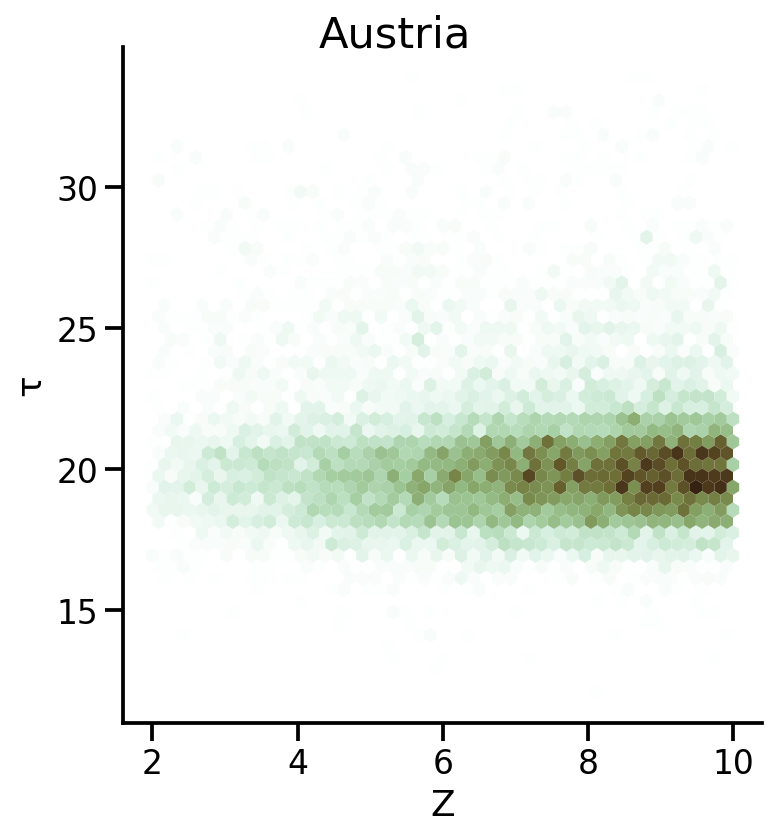

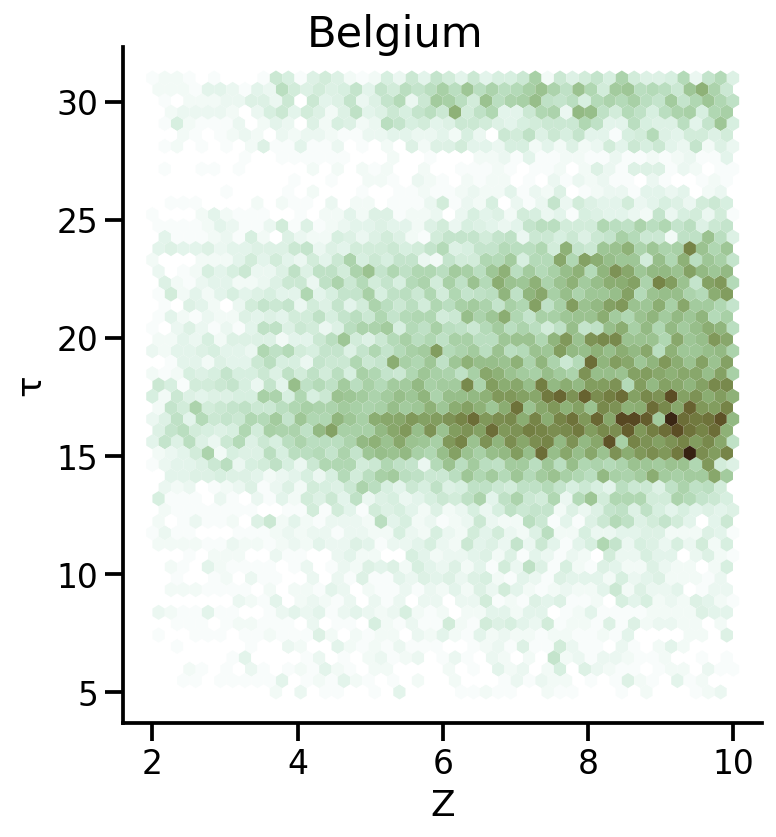

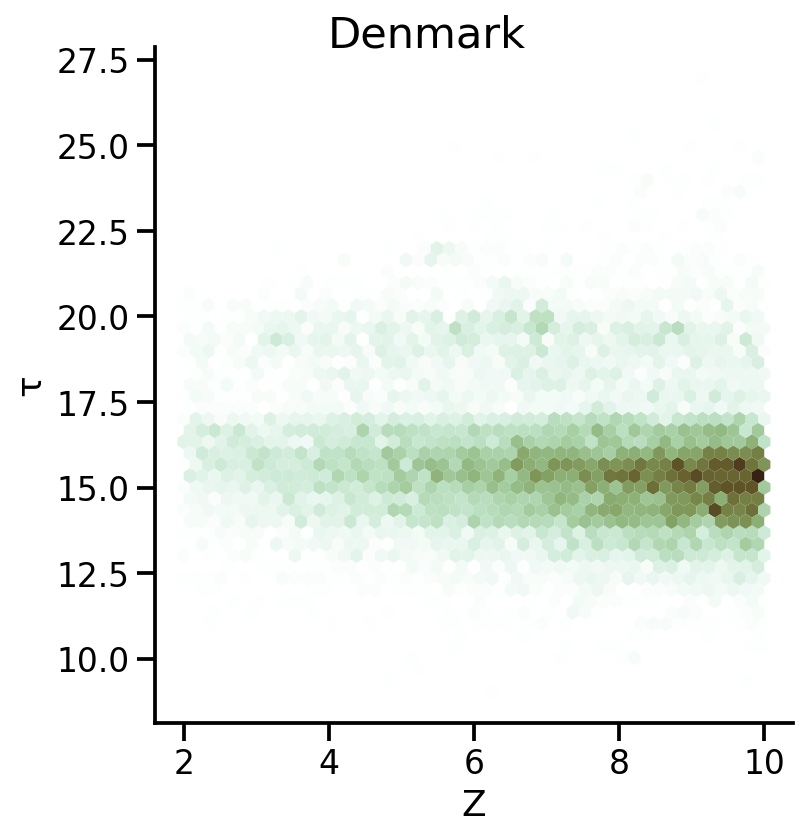

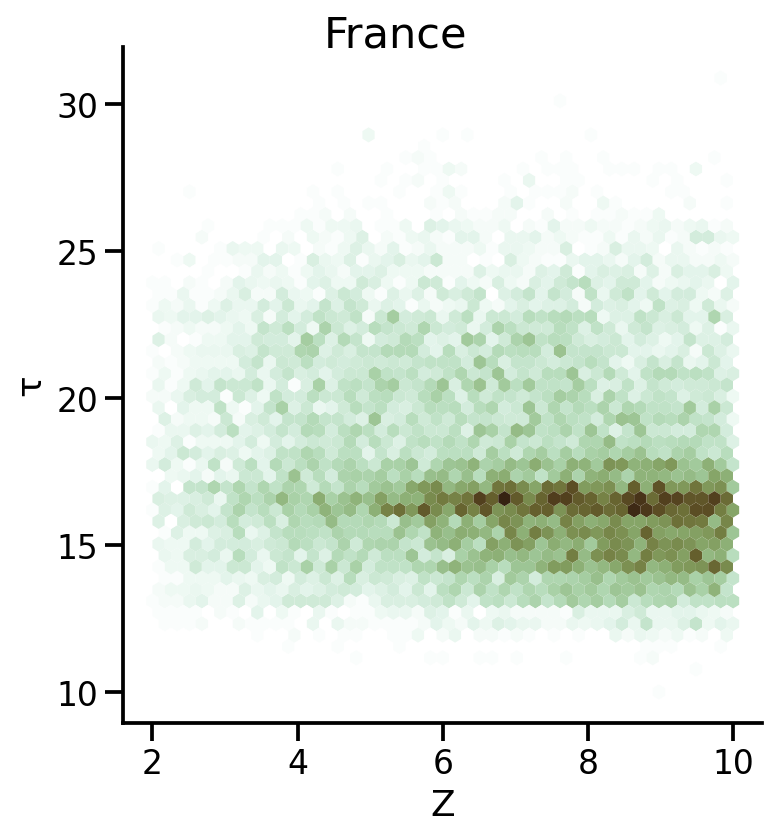

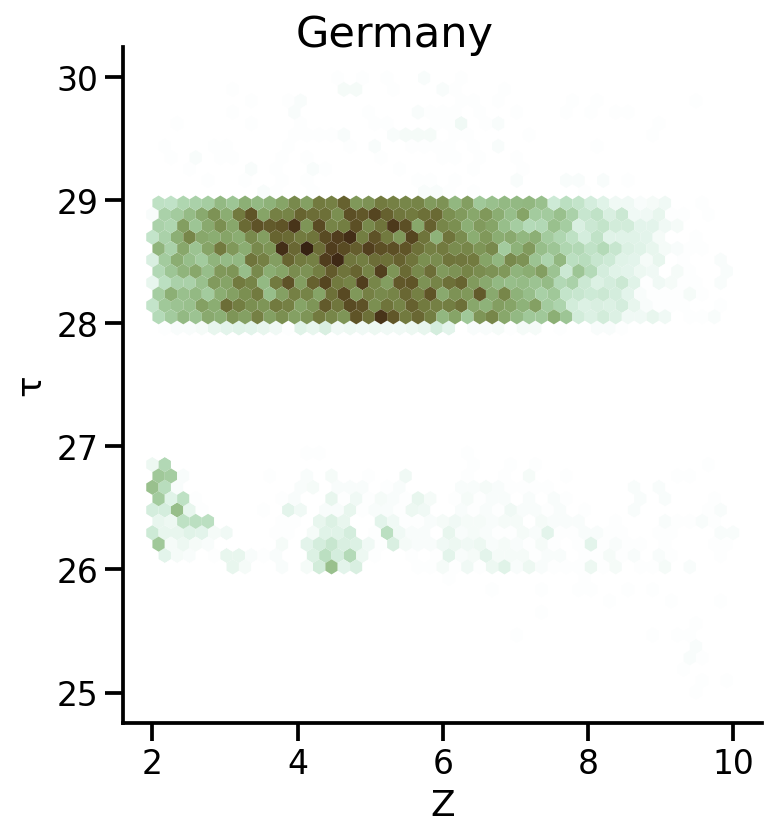

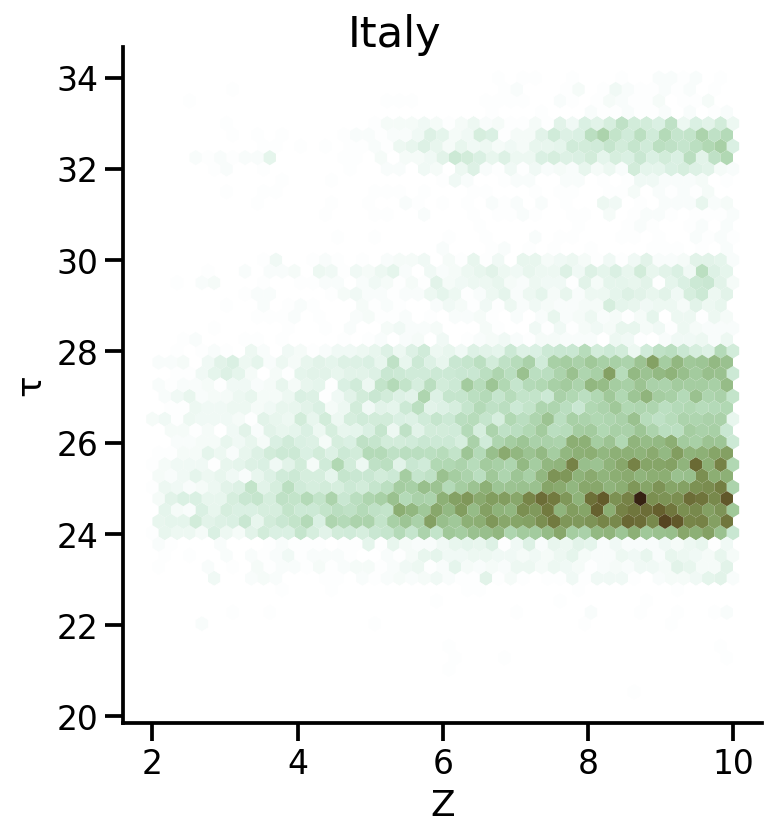

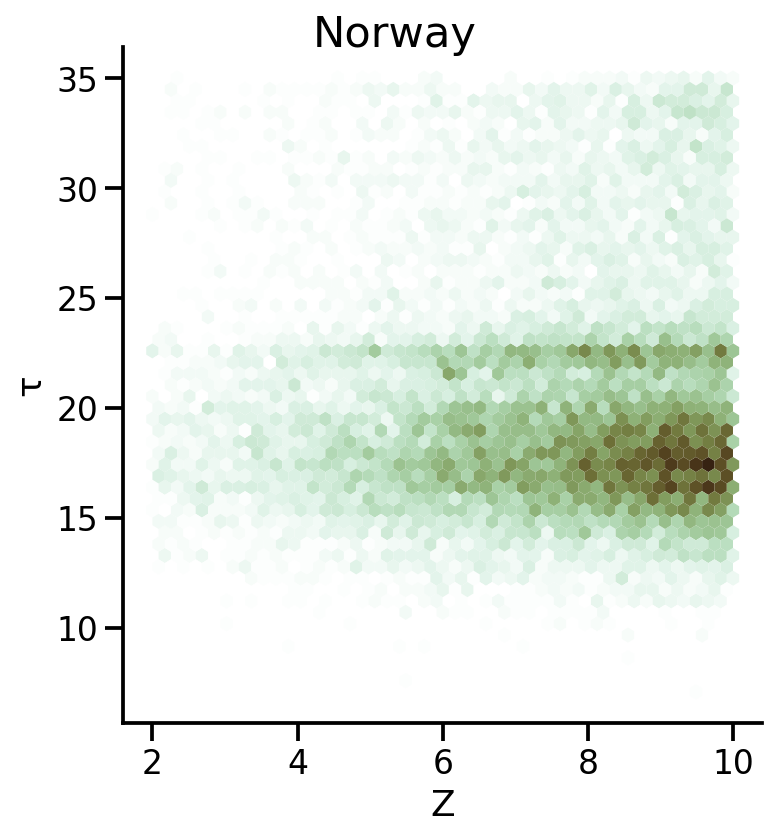

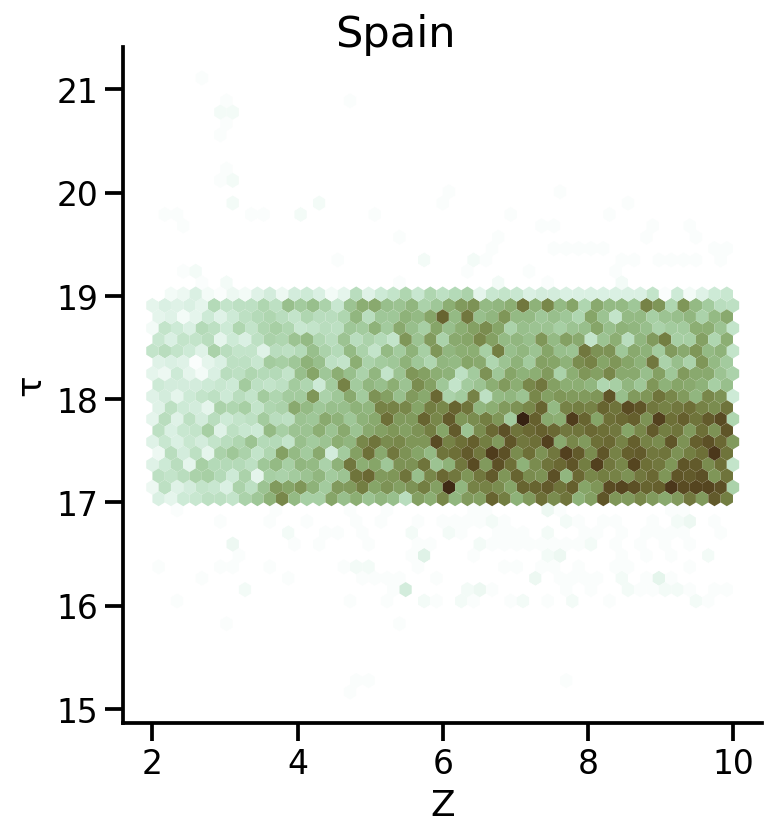

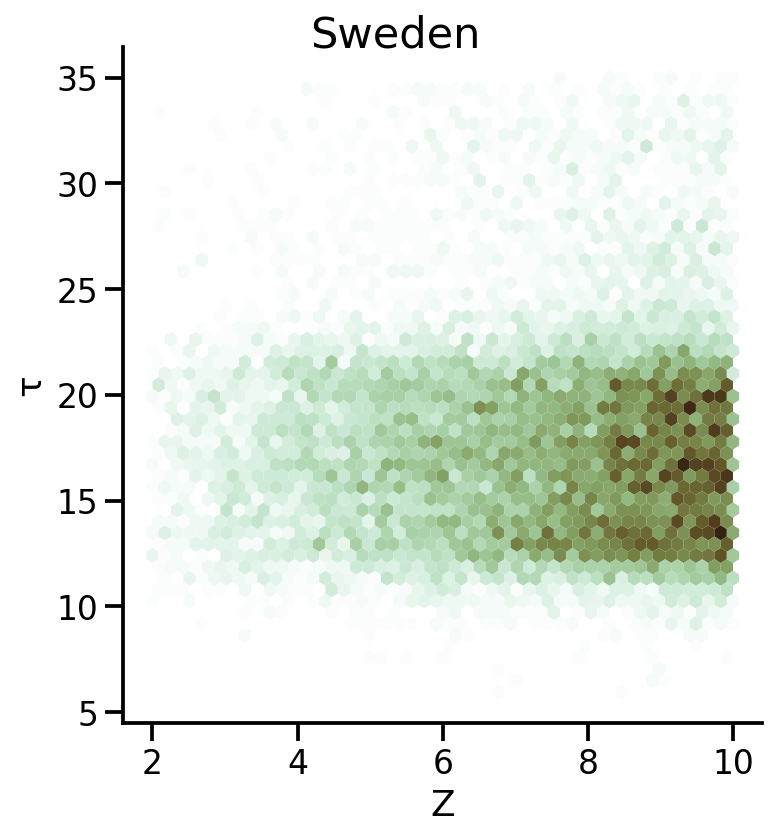

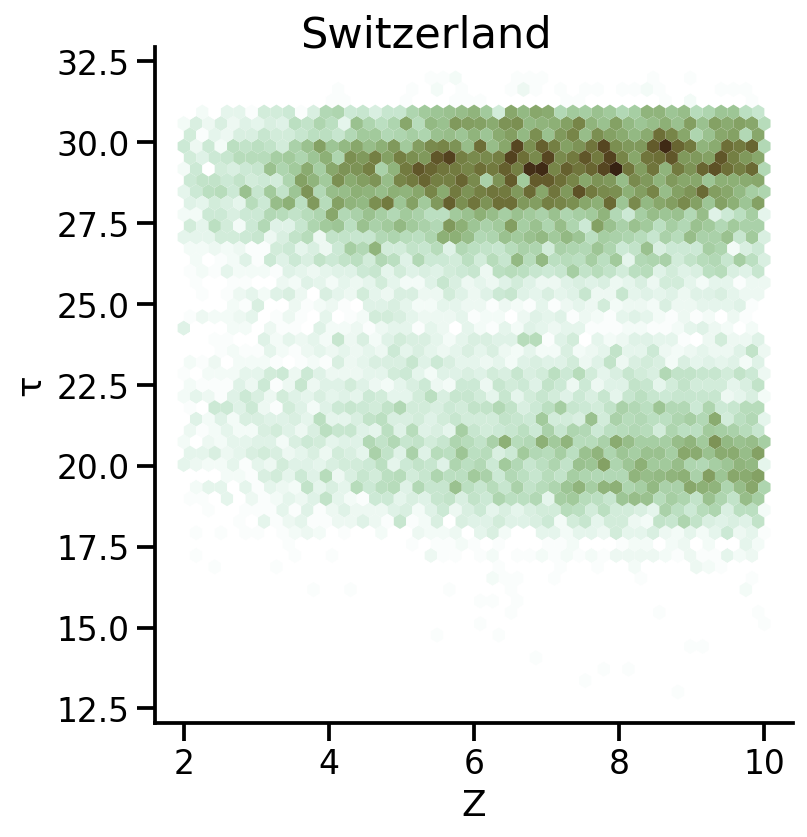

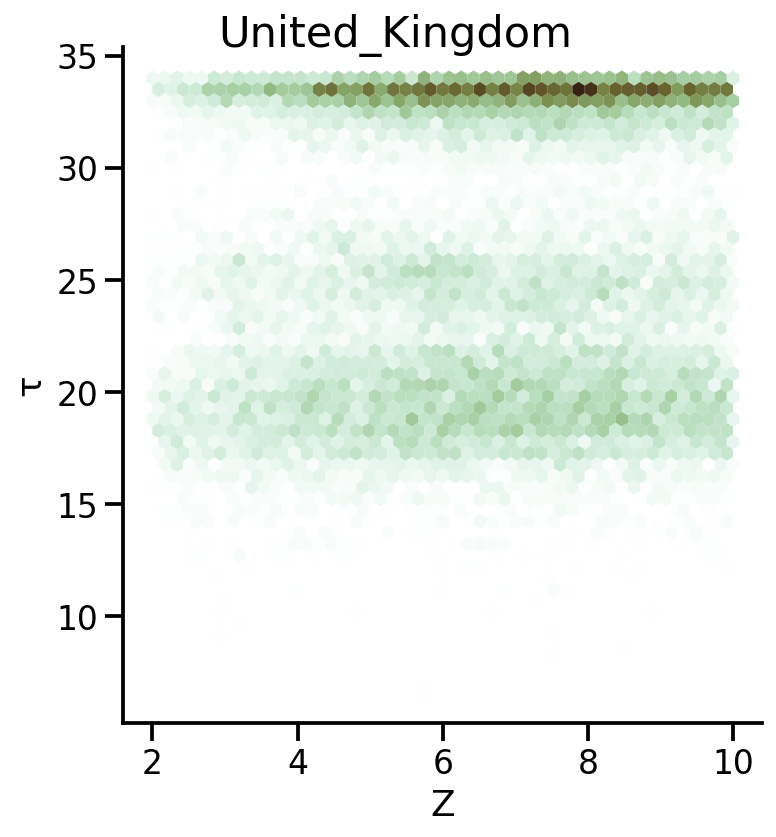

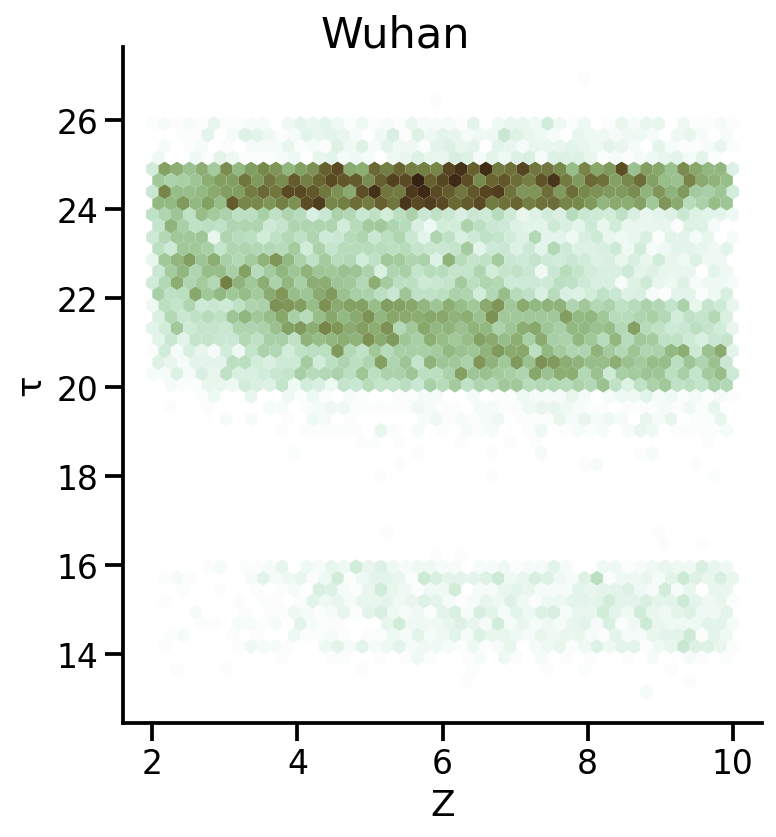

CPU times: user 2min 34s, sys: 51.5 s, total: 3min 26s
Wall time: 4min 39s


In [287]:
%%time
def plot_joint_dists(randindxs, title):  
    def hex_wrapper(*args, **kwargs):
        kwargs['color'] = None
        return plt.hexbin(*args,**kwargs)
    
    post_sample = sample[randindxs]
    #dirty trick to ensure the axis is in [min,max]
    for i,var in enumerate(var_names[:-1]):
        post_sample[0,i] = params_bounds[var][0]
        post_sample[1,i] = params_bounds[var][1]
    df = pd.DataFrame(post_sample)
    df.columns=var_names    

    g = sns.PairGrid(df, y_vars=["τ"], x_vars=[var_names[:-1]], height=6)
    cmap = sns.cubehelix_palette(8,start=10,light=1, as_cmap=True)
    g = g.map(hex_wrapper, gridsize=47,cmap=cmap) #'Greys'
    g.fig.suptitle(title)
    return g.fig

pdf = matplotlib.backends.backend_pdf.PdfPages('test.pdf')
country_names =  ['Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Italy', 'Norway', 'Spain', 'Sweden', 
              'Switzerland', 'United_Kingdom', 'Wuhan']
for country_name in country_names:
    file_name = '../output/2020-05-31-z2-10/inference/{}.npz'.format(country_name)
    load_data(file_name, country_name)
    fig = plot_joint_dists(randindxs, country_name)
    plt.show()
    pdf.savefig(fig,bbox_inches="tight")
pdf.close()

In [273]:
list(range(6,12))

[6, 7, 8, 9, 10, 11]

In [274]:
%%time
reader = PyPDF2.PdfFileReader(open("test.pdf",'rb'))

page0 = reader.getPage(0)
page = PyPDF2.pdf.PageObject.createBlankPage(None, page0.mediaBox.getWidth(), page0.mediaBox.getHeight()*6)
for i in range(6):
    page2 = reader.getPage(i)
    page.mergeScaledTranslatedPage(page2,1,0,page1.mediaBox.getHeight()*(6-i-1))

writer = PdfFileWriter()
writer.addPage(page)

with open('joint-dist1.pdf', 'wb') as f:
    writer.write(f)

CPU times: user 2min 41s, sys: 3.88 s, total: 2min 45s
Wall time: 3min 31s


In [280]:
%%time
reader = PyPDF2.PdfFileReader(open("test.pdf",'rb'))

NUM_OF_PAGES = 6

page0 = reader.getPage(0)
h = page0.mediaBox.getHeight()
w = page0.mediaBox.getWidth()

newpdf_page = PyPDF2.pdf.PageObject.createBlankPage(None, w, h*NUM_OF_PAGES)
for i in range(6,12):
    next_page = reader.getPage(i)
    newpdf_page.mergeScaledTranslatedPage(next_page, 1, 0, h*(NUM_OF_PAGES-i-1-6))

writer = PdfFileWriter()
writer.addPage(newpdf_page)

with open('joint-dist2.pdf', 'wb') as f:
    writer.write(f)

CPU times: user 2min 36s, sys: 3.27 s, total: 2min 39s
Wall time: 3min 2s


In [278]:
%%time
reader = PyPDF2.PdfFileReader(open("test.pdf",'rb'))

NUM_OF_PAGES = reader.getNumPages()

page0 = reader.getPage(0)
h = page0.mediaBox.getHeight()
w = page0.mediaBox.getWidth()

newpdf_page = PyPDF2.pdf.PageObject.createBlankPage(None, w, h*NUM_OF_PAGES)
for i in range(NUM_OF_PAGES):
    next_page = reader.getPage(i)
    newpdf_page.mergeScaledTranslatedPage(next_page, 1, 0, h*(NUM_OF_PAGES-i-1))

writer = PdfFileWriter()
writer.addPage(newpdf_page)

with open('output.pdf', 'wb') as f:
    writer.write(f)

CPU times: user 29.5 s, sys: 768 ms, total: 30.3 s
Wall time: 44.8 s


In [276]:
reader.getNumPages()


12